# **Homework for Lecture 13**

충북대학교 정보통신공학부 2021039084 유승미

### **Step 1: Loading Dataset**

In [87]:
import pandas as pd
# https://www.kaggle.com/code/aninditakarmakar/vg-sales-regression-r2-score-95/input
df = pd.read_csv('vgsales.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### **Step 2: Data Observation**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [89]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### **Step 3: Exploratory Data Analysis**

In [90]:
df.drop(['Rank','Name', 'Platform', 'Genre', 'Publisher'], 
		axis = 1, inplace = True)

**수치형 데이터로 linear regression을 진행할 것이므로 object형 칼럼을 삭제하였다.**

In [91]:
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2281390371.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


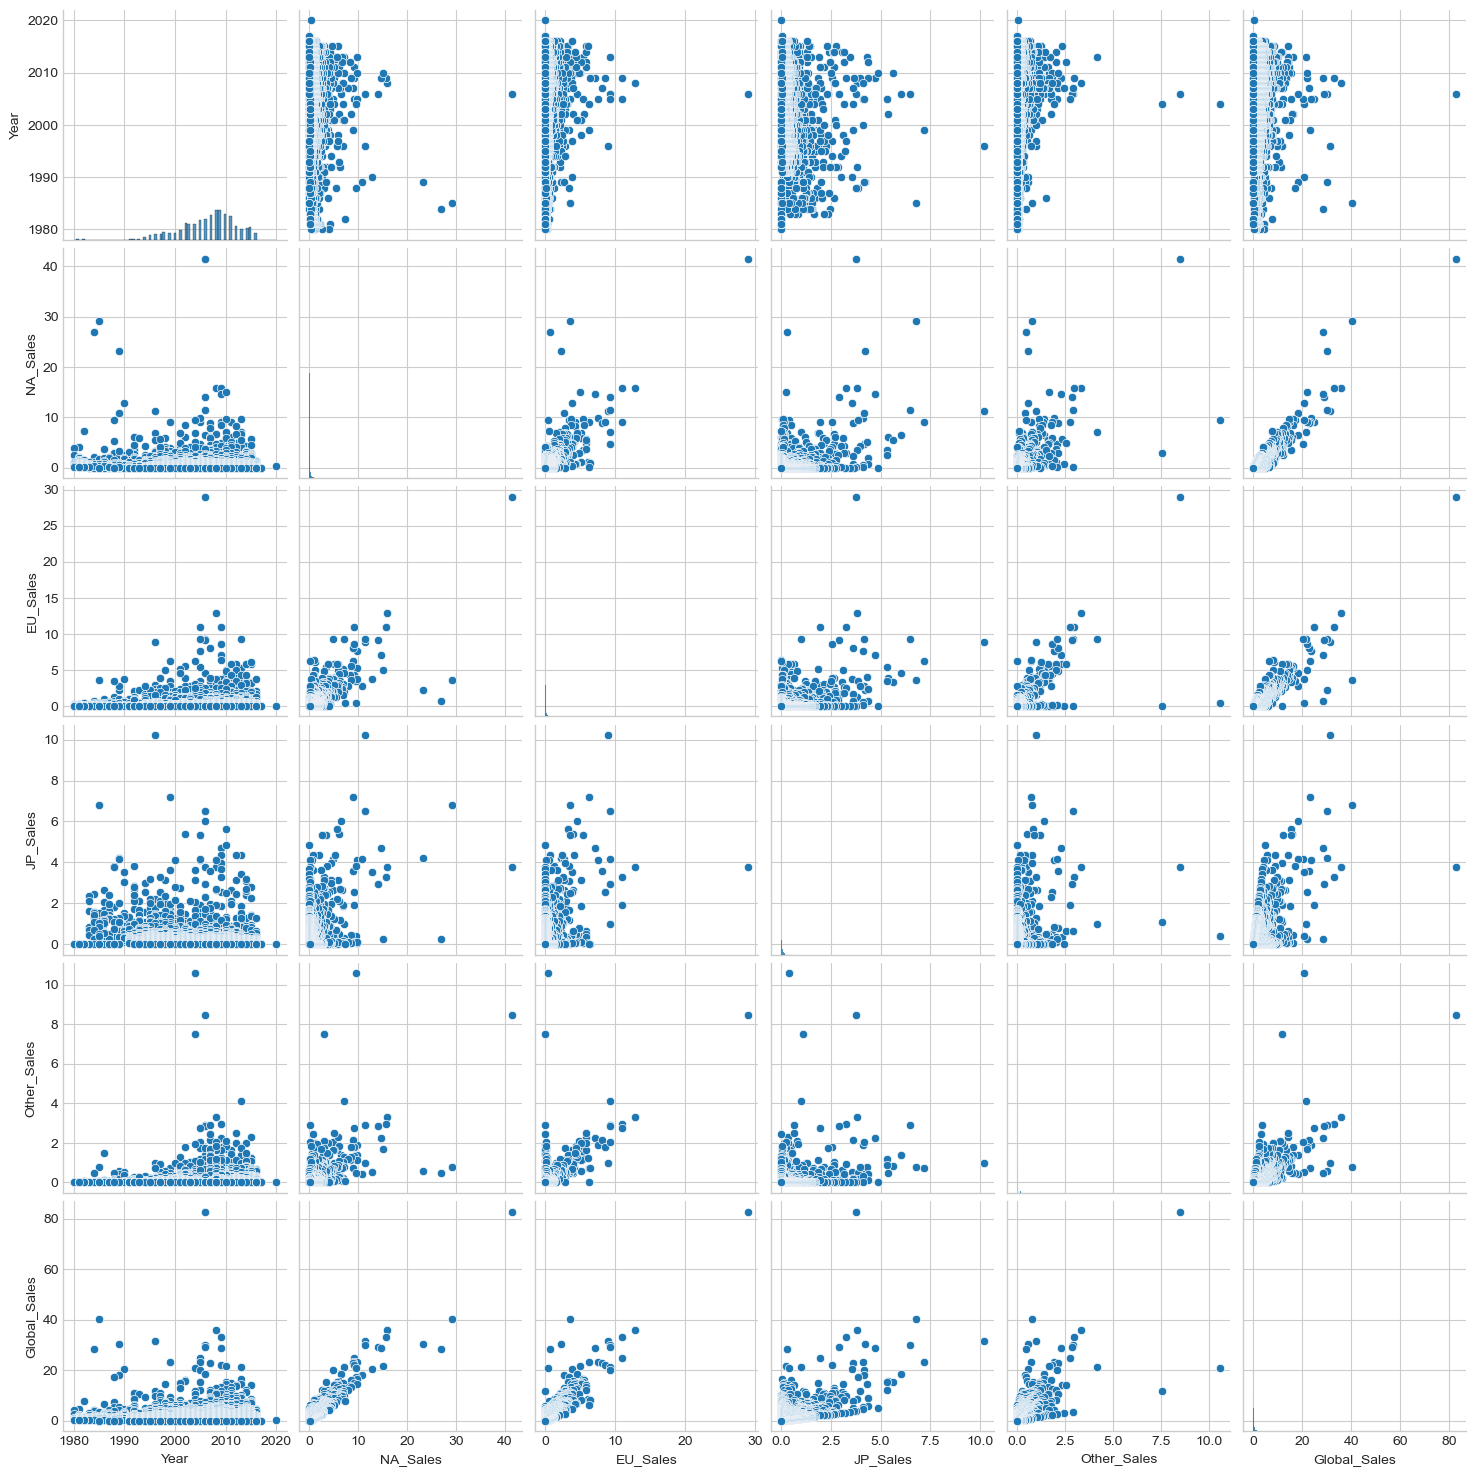

In [92]:
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
plt.savefig('pairplor.png')

**각 칼럼 간의 관계를 산점도 그래프로 시각화하여 양 또는 음의 선형 관계가 있는지 확인하였다. <br>
'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' 칼럼은 'Global_Sales' 칼럼과 선형관계를 가지는 것을 확인된다.**

<Axes: >

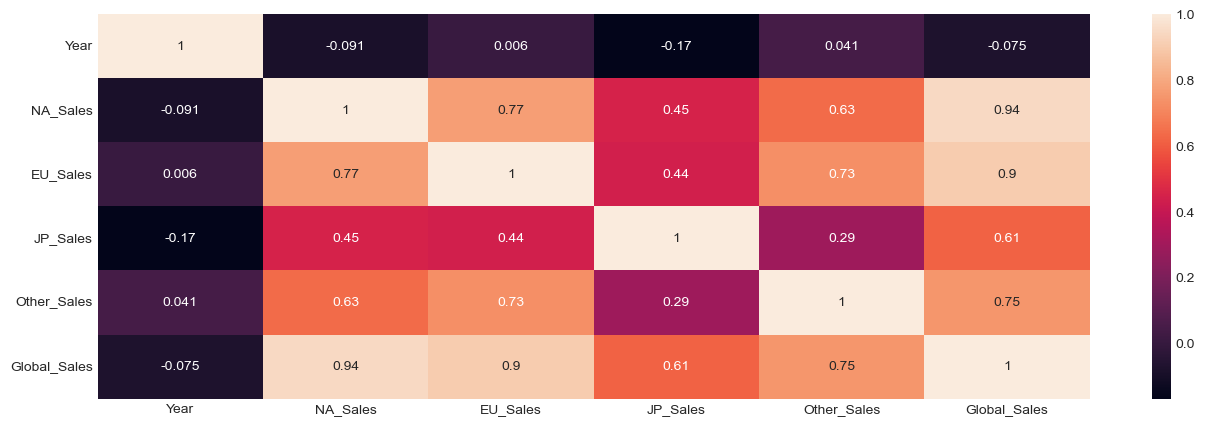

In [93]:
dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [94]:
df.drop(['Year'], 
		axis = 1, inplace = True)

**각 Feature 간의 상관관계를 히트맵으로 시각화한 결과는 위의 그래프와 같다. <br>
'Year' 칼럼은 'Global_Sales' 칼럼과의 상관관계가 낮다고 판단하여 삭제하였다. <br>
'Global_Sales' 칼럼과 선형관계를 가지는 나머지 네 칼럼은 상관관계가 높은 것을 확인할 수 있다.**

In [212]:
df.isnull().sum()

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**결측치가 있는지 알아본 결과, 모든 칼럼에서 결측치가 존재하지 않음을 확인할 수 있다.**

### **1. SLR(Simple Linear Regression)**

#### **1-(1) NA_Sales vs Global_Sales**

#### **Step 4: Splitting into training and testing datasets (SLR)**

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_var = df[['NA_Sales']] # independent variable
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

#### **Step 5: Training model (SLR)**

In [239]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

#### **Step 6: Checking accuracy (SLR)**

In [240]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.8384771871986524


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 선형 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.84이다. <br>
R2 score 값이 1에 가까울수록 모델이 데이터를 잘 설명하는 것을 의미하므로, <br>
모델이 데이터의 변동을 잘 설명한다고 할 수 있다.** 

*slope and intercept values from the model*

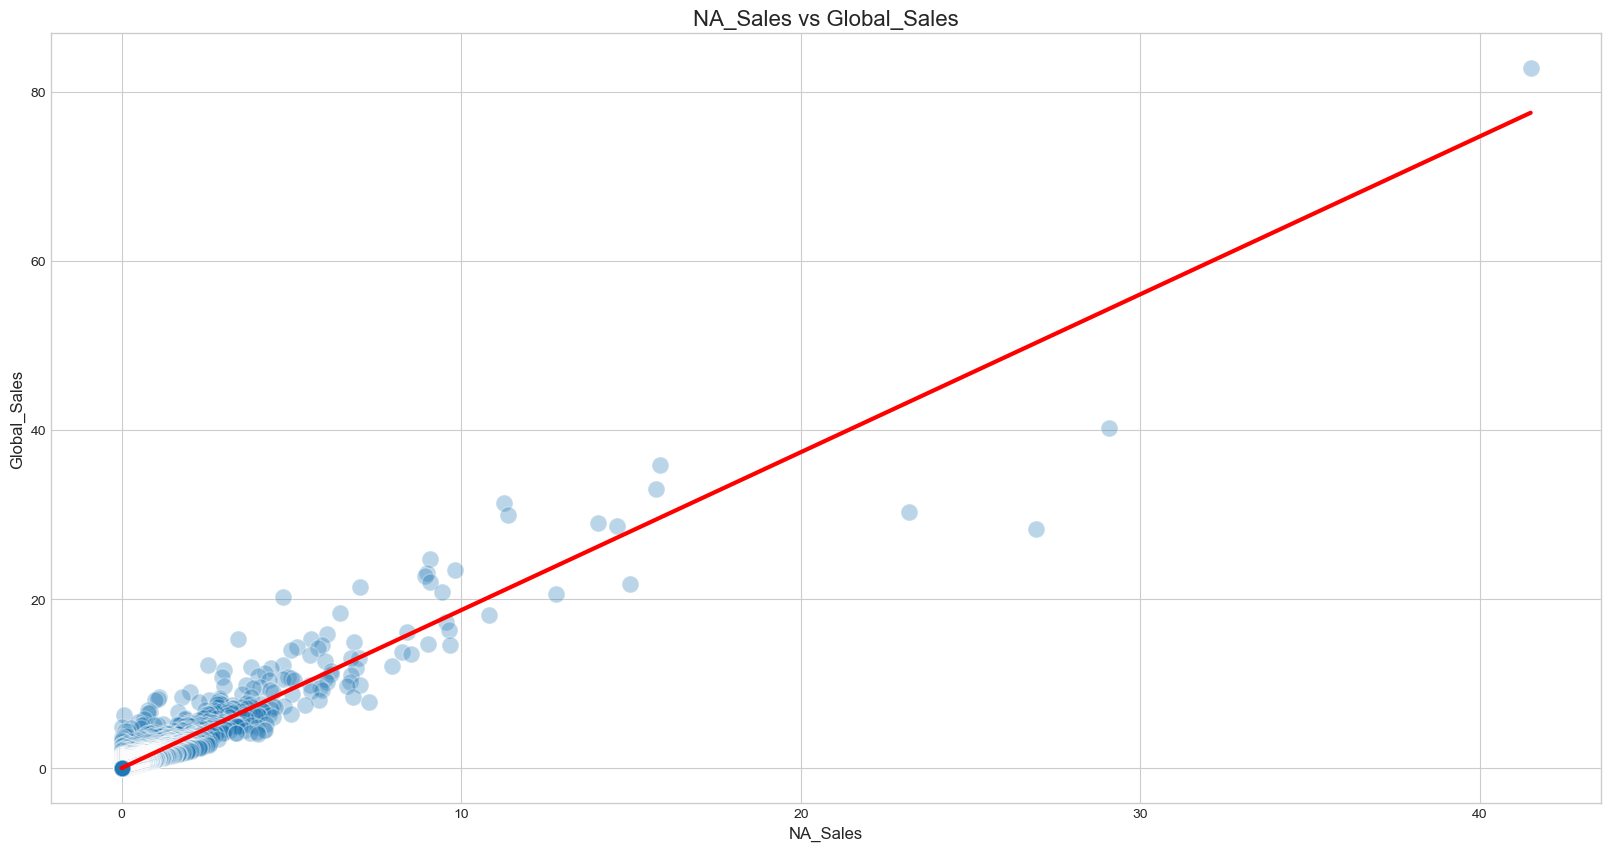

In [98]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'NA_Sales', y = 'Global_Sales', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['NA_Sales'], slr_slope*df['NA_Sales'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('NA_Sales vs Global_Sales', fontsize = 16)
plt.ylabel('Global_Sales', fontsize = 12)
plt.xlabel('NA_Sales', fontsize = 12)
plt.show()

In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 0.5848163511744463


**RMSE의 값의 경우 약 0.58로 개별 데이터에 대한 예측값과 실제값 간의 오차가 큰 편에 속한다.**

#### **Step 7: Improving accuracy (SLR)**

**(1) Changing split ratio**

In [250]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.8451481580760136
RMSE: 0.5888146985449769

Test Size: 0.3
R2 score: 0.8384771871986524
RMSE: 0.5848163511744463

Test Size: 0.4
R2 score: 0.8448655508361852
RMSE: 0.5431295355178614



**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
테스트데이터 사이즈가 0.2인 경우 R2 score가 가장 높았고, <br>
테스트데이터 사이즈가 0.4인 경우에 RMSE 값이 가장 낮은 것을 확인할 수 있다.**

**(2) Feature Scaling**

In [251]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


**값의 범위가 크게 차이 나는 칼럼이 존재하지 않아  Feature Scaling은 진행하지 않았다.**

**(3) Remove Outliers**

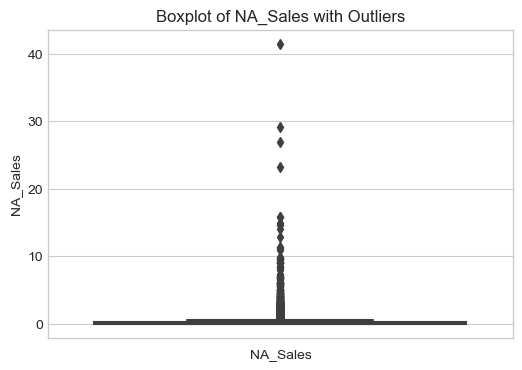

In [264]:
plt.figure(figsize=(6, 4))
sb.boxplot(df, y='NA_Sales')
plt.title('Boxplot of NA_Sales with Outliers')
plt.xlabel('NA_Sales')
plt.show()

In [266]:
df_out = df.copy()
df_out.drop(df_out[df_out.NA_Sales > 40].index, inplace = True)

In [267]:
X_var = df_out[['NA_Sales']] # independent variable
y_var = df_out['Global_Sales'] # dependent variable

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.8278555917887662
RMSE: 0.6068475760784785

Test Size: 0.3
R2 score: 0.8432176132303156
RMSE: 0.5659359437099653

Test Size: 0.4
R2 score: 0.8481903650927957
RMSE: 0.5287517451962799



**이상치를 제거하고 학습을 진행한 결과, <br>
Test Size: 0.2 : R2 score 값이 감소하고, RMSE 값이 증가해 성능이 떨어졌다고 할 수 있다. <br>
Test Size: 0.3 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 조금 향상됐다고 할 수 있다. <br>
Test Size: 0.4 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 조금 향상됐다고 할 수 있다.**

#### **1-(2) EU_Sales vs Global_Sales**

#### **Step 4: Splitting into training and testing datasets (SLR)**

In [268]:
from sklearn.model_selection import train_test_split

X_var = df[['EU_Sales']] # independent variable
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

#### **Step 5: Training model (SLR)**

In [269]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

#### **Step 6: Checking accuracy (SLR)**

In [270]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.7335720154423575


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 선형 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.73이다. <br>
'NA_Sales'가 독립 변수인 경우보다 상대적으로 모델이 데이터의 변동을 잘 설명하지 못한다고 할 수 있다.**

*slope and intercept values from the model*

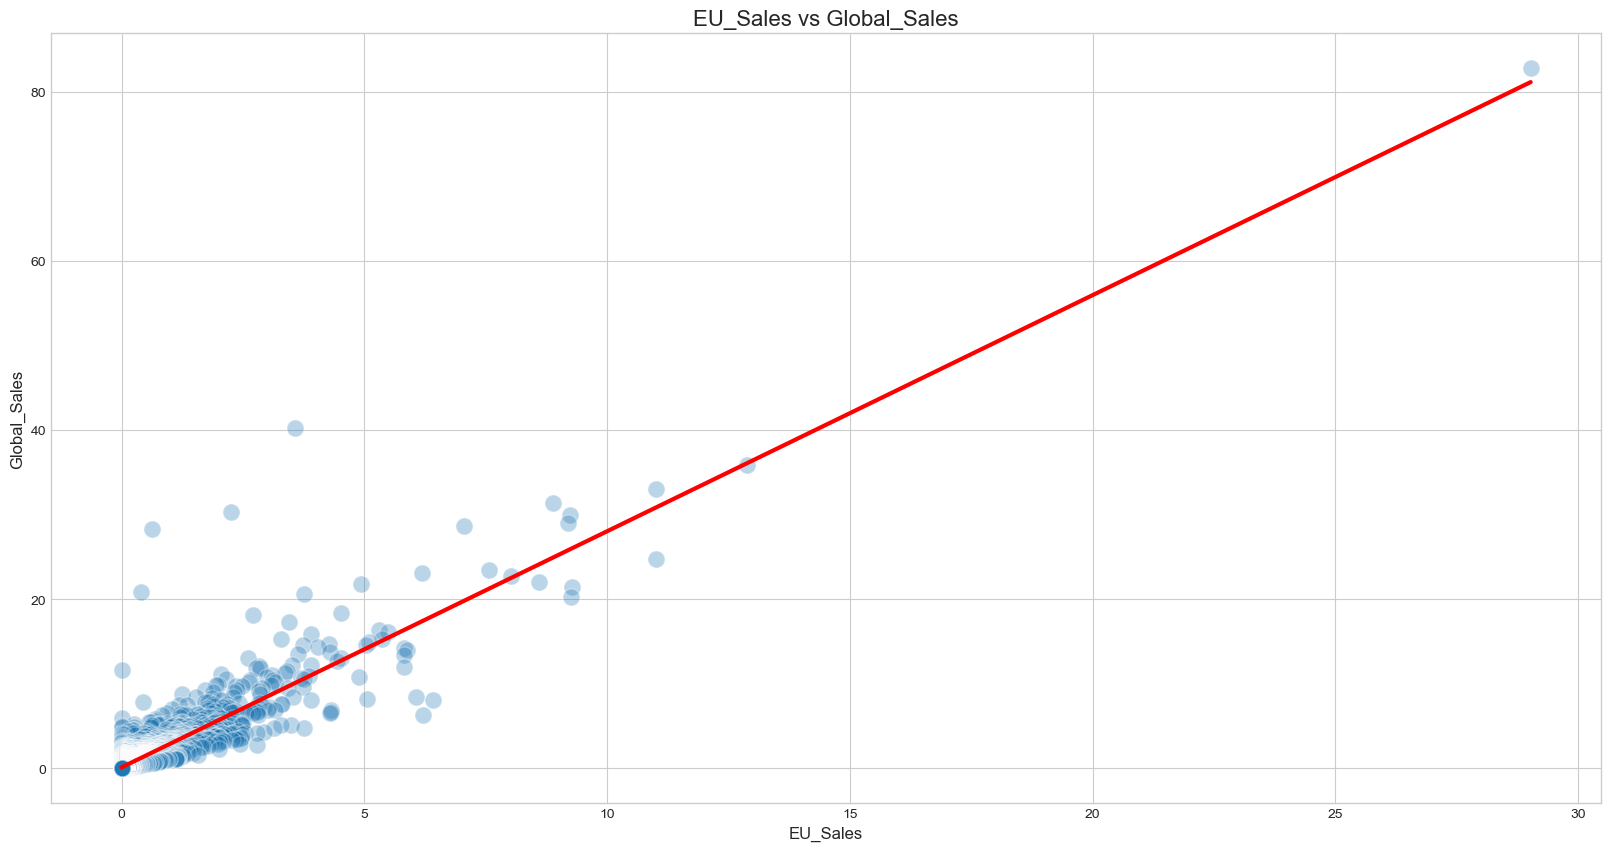

In [109]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'EU_Sales', y = 'Global_Sales', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['EU_Sales'], slr_slope*df['EU_Sales'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('EU_Sales vs Global_Sales', fontsize = 16)
plt.ylabel('Global_Sales', fontsize = 12)
plt.xlabel('EU_Sales', fontsize = 12)
plt.show()

In [271]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 0.7510908858846217


**RMSE의 값의 경우 약 0.75로 개별 데이터에 대한 예측값과 실제값 간의 오차가 큰 편에 속한다.**

#### **Step 7: Improving accuracy (SLR)**

**(1) Changing split ratio**

In [272]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.7605633845599639
RMSE: 0.7321764187238824

Test Size: 0.3
R2 score: 0.7335720154423575
RMSE: 0.7510908858846217

Test Size: 0.4
R2 score: 0.7430711330272384
RMSE: 0.6989655116831077



**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
테스트데이터 사이즈가 0.2인 경우 R2 score가 가장 높았고, <br>
테스트데이터 사이즈가 0.4인 경우에 RMSE 값이 가장 낮은 것을 확인할 수 있다.**

**(2) Feature Scaling** <br>
앞서 확인한 바 값의 범위가 크게 차이 나는 칼럼이 존재하지 않아 생략한다.

**(3) Remove Outliers**

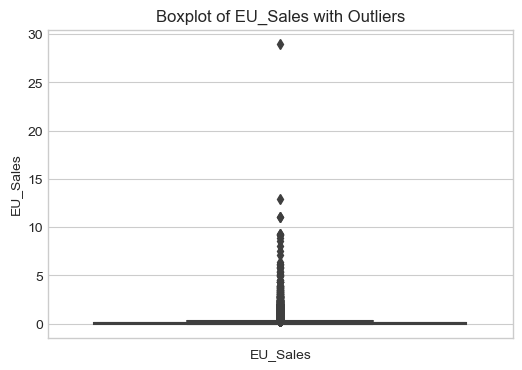

In [307]:
plt.figure(figsize=(6, 4))
sb.boxplot(df, y='EU_Sales')
plt.title('Boxplot of EU_Sales with Outliers')
plt.xlabel('EU_Sales')
plt.show()

In [276]:
df_out.drop(df_out[df_out.EU_Sales > 25].index, inplace = True)

In [277]:
X_var = df_out[['EU_Sales']] # independent variable
y_var = df_out['Global_Sales'] # dependent variable

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.714571739679595
RMSE: 0.7814148257641068

Test Size: 0.3
R2 score: 0.760633419856121
RMSE: 0.6992788603104448

Test Size: 0.4
R2 score: 0.7609249495843298
RMSE: 0.6635433085510762



**이상치를 제거하고 학습을 진행한 결과, <br>
Test Size: 0.2 : R2 score 값이 감소하고, RMSE 값이 증가해 성능이 떨어졌다고 할 수 있다. <br>
Test Size: 0.3 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 향상됐다고 할 수 있다. <br>
Test Size: 0.4 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 향상됐다고 할 수 있다.**

#### **1-(3) JP_Sales vs Global_Sales**

#### **Step 4: Splitting into training and testing datasets (SLR)**

In [287]:
from sklearn.model_selection import train_test_split

X_var = df[['JP_Sales']] # independent variable
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

#### **Step 5: Training model (SLR)**

In [288]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

#### **Step 6: Checking accuracy (SLR)**

In [289]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.36442767646030105


**'JP_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 선형 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.36이다. <br>
R2 score 값이 1에 가까울수록 모델이 데이터를 잘 설명하는 것을 의미하므로, <br>
모델이 데이터의 변동을 설명하지 못한다고 할 수 있다.** 

*slope and intercept values from the model*

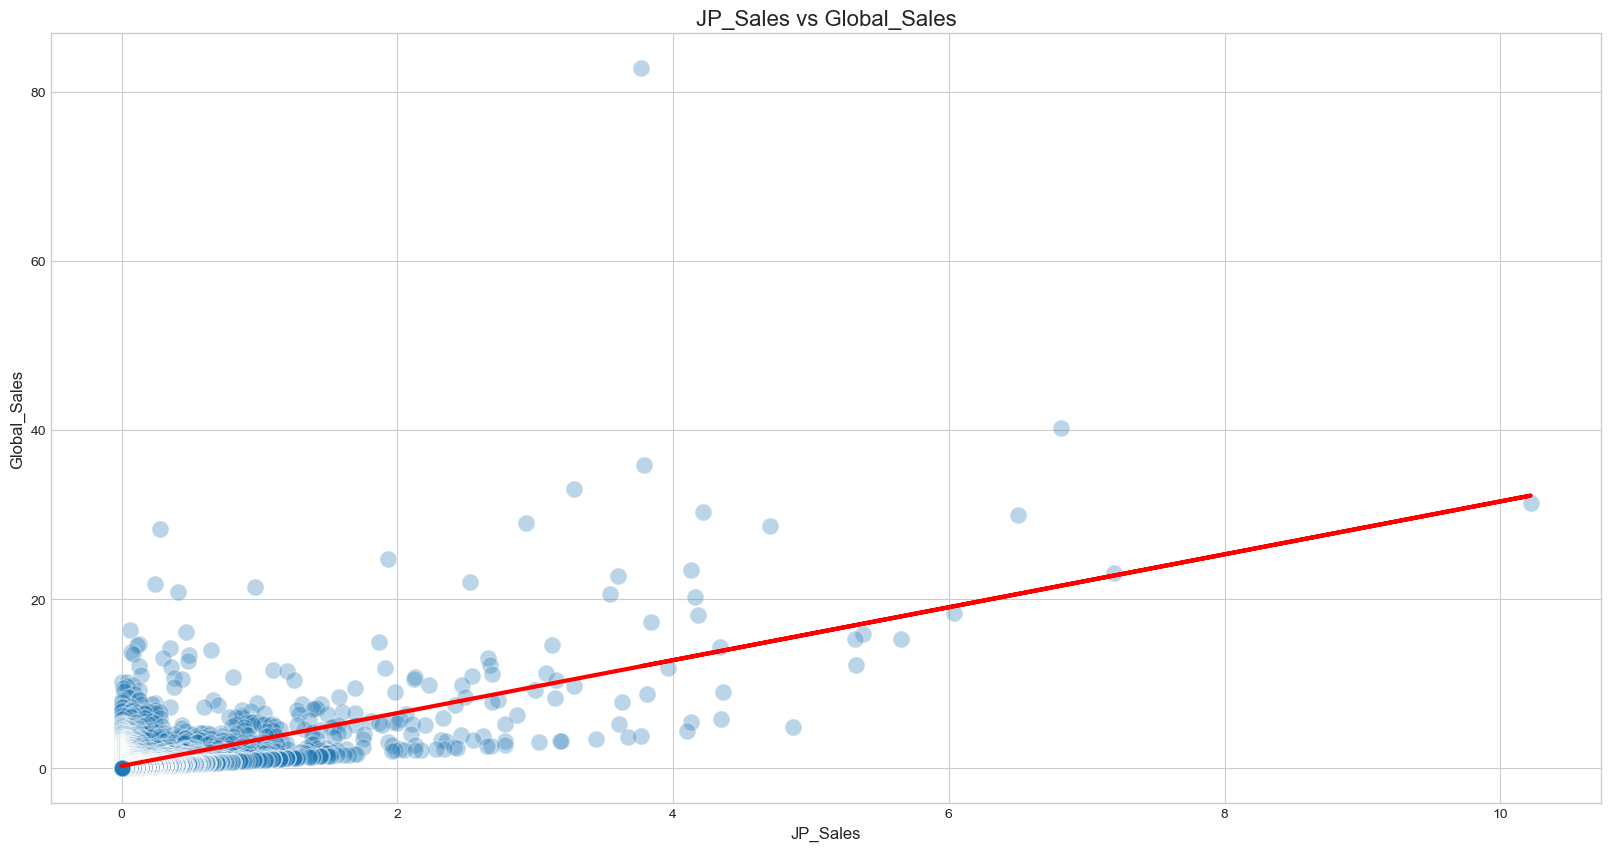

In [290]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'JP_Sales', y = 'Global_Sales', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['JP_Sales'], slr_slope*df['JP_Sales'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('JP_Sales vs Global_Sales', fontsize = 16)
plt.ylabel('Global_Sales', fontsize = 12)
plt.xlabel('JP_Sales', fontsize = 12)
plt.show()

In [291]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 1.1600723108051565


**RMSE의 값의 경우 약 1.16로 개별 데이터에 대한 예측값과 실제값 간의 오차가 아주 큰 편에 속한다.**

#### **Step 7: Improving accuracy (SLR)**

In [293]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.3397639018330316
RMSE: 1.2158222523875852

Test Size: 0.3
R2 score: 0.36442767646030105
RMSE: 1.1600723108051565

Test Size: 0.4
R2 score: 0.3310985497087717
RMSE: 1.1277955204929546



**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
테스트데이터 사이즈가 0.3인 경우 R2 score가 가장 높았고, <br>
테스트데이터 사이즈가 0.4인 경우에 RMSE 값이 가장 낮은 것을 확인할 수 있다.**

**(2) Feature Scaling** <br>
앞서 확인한 바 값의 범위가 크게 차이 나는 칼럼이 존재하지 않아 생략한다.

**(3) Remove Outliers**

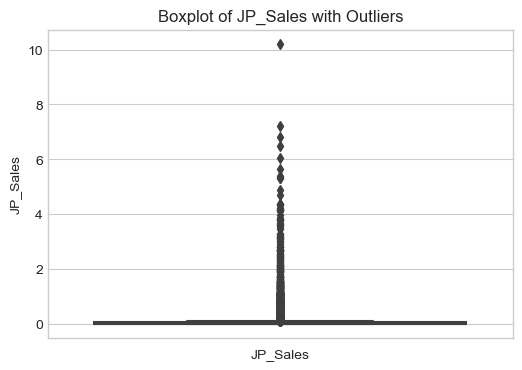

In [308]:
plt.figure(figsize=(6, 4))
sb.boxplot(df, y='JP_Sales')
plt.title('Boxplot of JP_Sales with Outliers')
plt.xlabel('JP_Sales')
plt.show()

In [296]:
df_out.drop(df_out[df_out.JP_Sales > 10].index, inplace = True)

In [299]:
X_var = df_out[['JP_Sales']] # independent variable
y_var = df_out['Global_Sales'] # dependent variable

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.35494341392023776
RMSE: 1.1396873303484425

Test Size: 0.3
R2 score: 0.3388781128296431
RMSE: 1.1322071437452919

Test Size: 0.4
R2 score: 0.33315156640860877
RMSE: 1.0829183263178779



**이상치를 제거하고 학습을 진행한 결과, <br>
Test Size: 0.2 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 조금 향상됐다고 할 수 있다. <br>
Test Size: 0.3 : R2 score 값과 RMSE의 값 모두 감소하였다. <br>
Test Size: 0.4 : R2 score 값은 이전과 비슷하고, RMSE의 값은 낮아졌다.**

#### **1-(4) Other_Sales vs Global_Sales**

#### **Step 4: Splitting into training and testing datasets (SLR)**

In [300]:
from sklearn.model_selection import train_test_split

X_var = df[['Other_Sales']] # independent variable
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

#### **Step 5: Training model (SLR)**

In [301]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

#### **Step 6: Checking accuracy (SLR)**

In [302]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.5740161990488806


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 선형 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.57이다. <br>
R2 score 값이 1에 가까울수록 모델이 데이터를 잘 설명하는 것을 의미하므로, <br>
모델이 데이터의 변동을 잘 설명하지 못한다고 할 수 있다.** 

*slope and intercept values from the model*

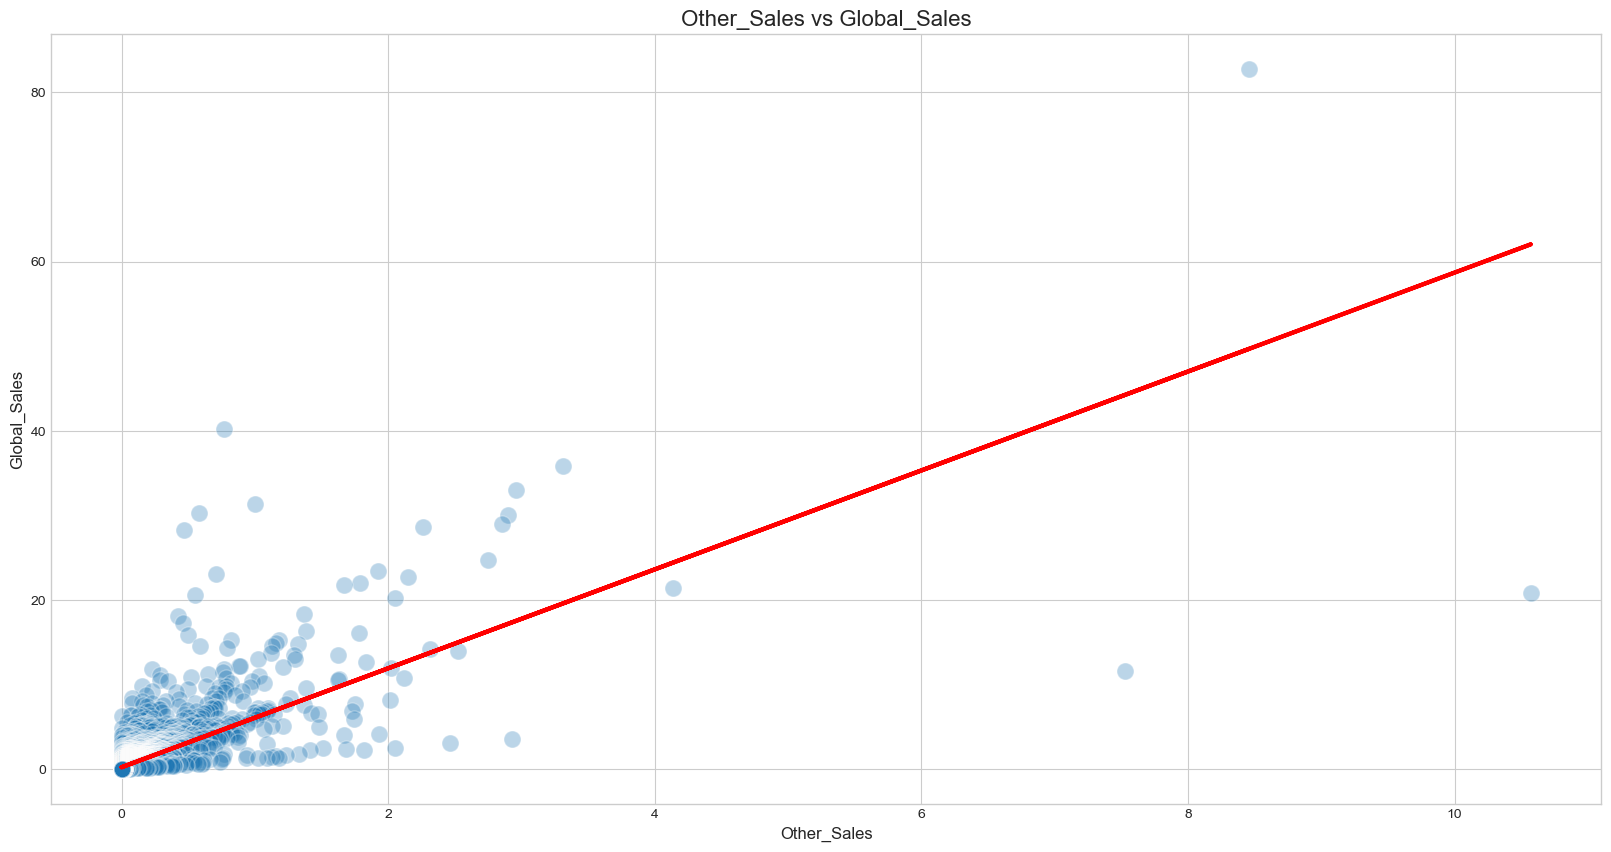

In [188]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'Other_Sales', y = 'Global_Sales', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Other_Sales'], slr_slope*df['Other_Sales'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('Other_Sales vs Global_Sales', fontsize = 16)
plt.ylabel('Global_Sales', fontsize = 12)
plt.xlabel('Other_Sales', fontsize = 12)
plt.show()

In [303]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, yhat)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 0.949727720888203


**RMSE의 값의 경우 약 0.95로 개별 데이터에 대한 예측값과 실제값 간의 오차가 큰 편에 속한다.**

#### **Step 7: Improving accuracy (SLR)**

**(1) Changing split ratio**

In [305]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.6079783790982578
RMSE: 0.9368616571241511

Test Size: 0.3
R2 score: 0.5740161990488806
RMSE: 0.949727720888203

Test Size: 0.4
R2 score: 0.4943617143239979
RMSE: 0.9805489333591424



**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
테스트데이터 사이즈가 0.2인 경우 R2 score가 가장 높고, <br>
RMSE 값이 가장 낮은 것을 확인할 수 있다.**

**(2) Feature Scaling** <br>
앞서 확인한 바 값의 범위가 크게 차이 나는 칼럼이 존재하지 않아 생략한다.

**(3) Remove Outliers**

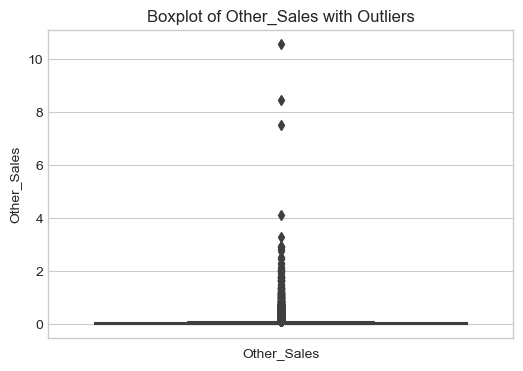

In [306]:
plt.figure(figsize=(6, 4))
sb.boxplot(df, y='Other_Sales')
plt.title('Boxplot of Other_Sales with Outliers')
plt.xlabel('Other_Sales')
plt.show()

In [309]:
df_out.drop(df_out[df_out.Other_Sales > 6].index, inplace = True)

In [310]:
X_var = df_out[['Other_Sales']] # independent variable
y_var = df_out['Global_Sales'] # dependent variable

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X_var, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.6040070547582326
RMSE: 0.8864850150772681

Test Size: 0.3
R2 score: 0.6271632654994672
RMSE: 0.8444662753186234

Test Size: 0.4
R2 score: 0.6384265444317154
RMSE: 0.7910362620979499



**이상치를 제거하고 학습을 진행한 결과, <br>
Test Size: 0.2 : R2 score 값은 이전과 비슷하며, RMSE 값이 감소하였다.<br>
Test Size: 0.3 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 향상됐다고 할 수 있다. <br>
Test Size: 0.4 : R2 score 값이 증가하고, RMSE의 값은 낮아져 성능이 향상됐다고 할 수 있다.**

### **2. MLR (Multiple linear regression)**

#### **Step 4: Splitting into training and testing datasets (MLR)**

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

#### **Step 5: Training model and checking out accuracy (MLR)**

In [334]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

#### **Step 6: Checking accuracy (MLR)**

In [335]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.9999873205864691


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 선형 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 1이다. <br>
R2 score 값이 1에 가까울수록 모델이 데이터를 잘 설명하는 것을 의미하므로, <br>
모델이 데이터의 변동을 거의 정확히 설명한다고 할 수 있다.** 

**< Constructing a distribution plot by combining the predicted values and the actual values >**

C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot

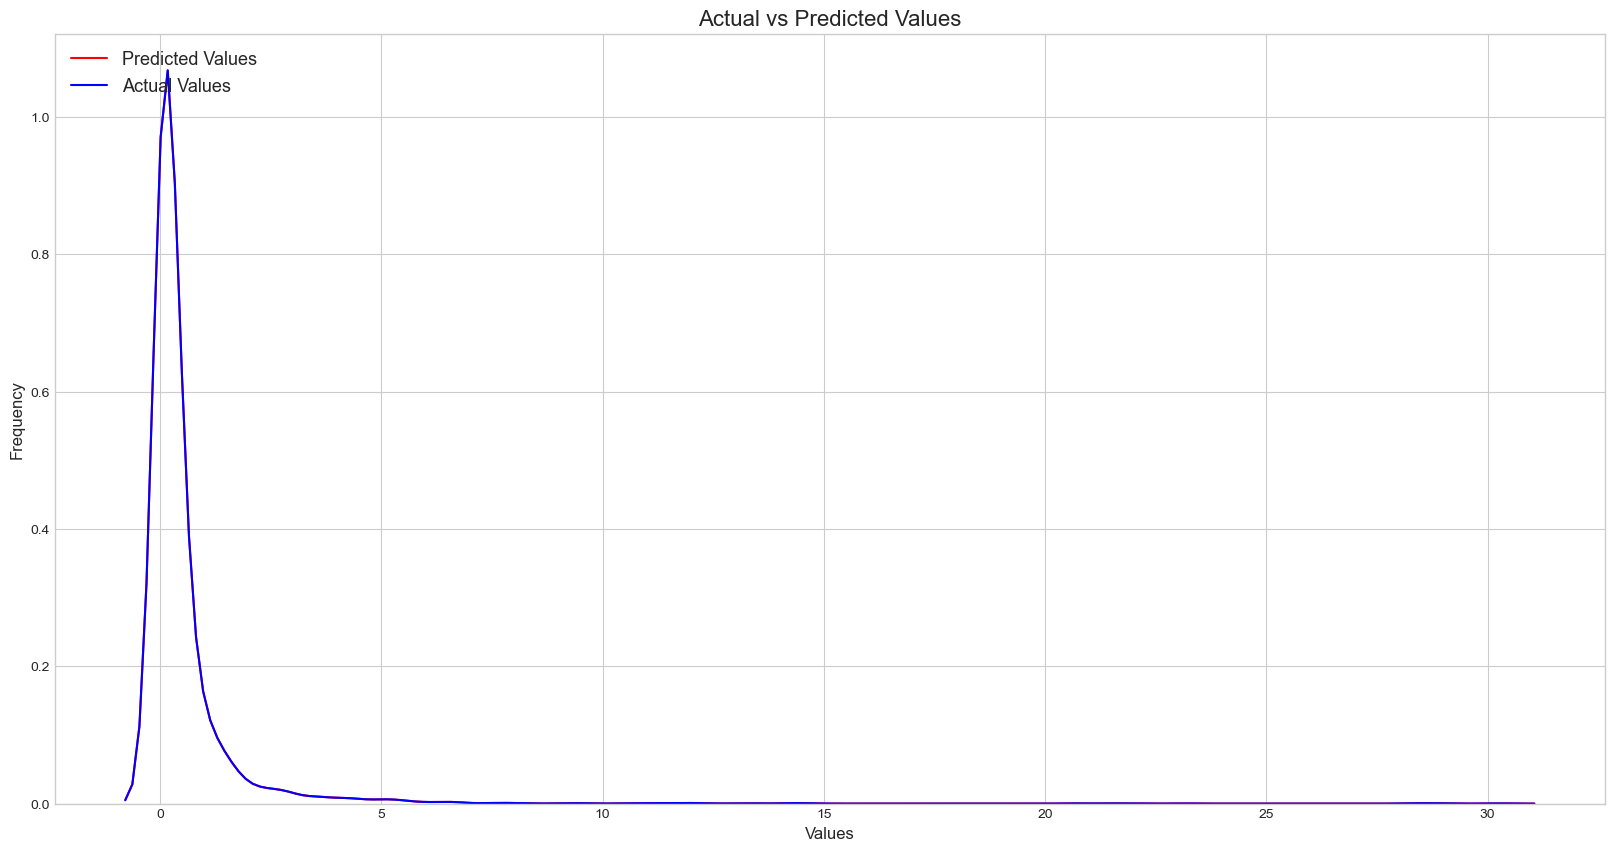

In [336]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

**모델이 예측한 값과 실제 값의 오차가 거의 없는 것을 확인할 수 있다.**

#### ***Check out accuracy : RMSE**

In [337]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE: {}'.format(rmse))

RMSE: 0.005181460067375253


**RMSE의 값의 경우 거의 0에 가까운 값으로 개별 데이터에 대한 예측값과 실제값 간의 오차가 거의 존재하지 않는 편이다.**

#### **Step 7: Improving accuracy (MLR)**

**(1) Changing split ratio**

In [338]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X1_var_scaled, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.999987961673058
RMSE: 0.005191627472368254

Test Size: 0.3
R2 score: 0.9999873205864691
RMSE: 0.005181460067375253

Test Size: 0.4
R2 score: 0.9999858616060363
RMSE: 0.0051850068681682125



**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과 거의 동일하지만, <br>
테스트데이터 사이즈가 0.2인 경우 R2 score가 가장 높았고, <br>
테스트데이터 사이즈가 0.3인 경우에 RMSE 값이 가장 낮은 것을 확인할 수 있다.**

**(2) Feature Scaling** <br>
앞서 확인한 바 값의 범위가 크게 차이 나는 칼럼이 존재하지 않아 생략한다.

**(3) Remove Outliers** <br>
앞서 확인한 각각의 칼럼들의 outliers를 제거한 데이터셋으로 모델 학습을 진행하였다.

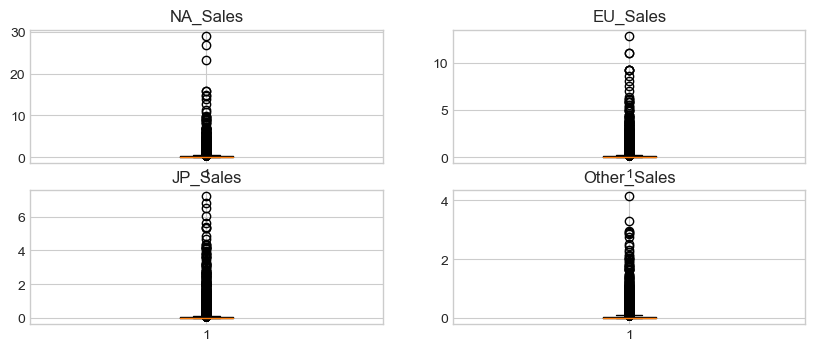

In [339]:
num_cols = ['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']

plt.figure(figsize=(10,8))
for i,col in enumerate(num_cols):
    ax = plt.subplot(4,2,i+1)
    plt.title(col)
    ax.boxplot(df_out[col])
    
plt.show()

In [340]:
scaler = StandardScaler()

X1_var = df_out[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df_out['Global_Sales'] # dependent variable

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X1_var_scaled, y_var, test_size = test_size, random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    yhat = lr.predict(X_test)
    
    print("Test Size:", test_size)
    print("R2 score:", r2_score(y_test, yhat))

    mse = mean_squared_error(y_test, yhat)
    rmse = np.sqrt(mse)
    print('RMSE: {}\n'.format(rmse))

Test Size: 0.2
R2 score: 0.9999863523500593
RMSE: 0.005204231553942183

Test Size: 0.3
R2 score: 0.9999860463804958
RMSE: 0.005166142728618508

Test Size: 0.4
R2 score: 0.9999844576248458
RMSE: 0.0051862902269884294



**이전과 모델 성능의 차이가 거의 없음을 알 수 있다.**

### **3. Ensemble Model : AdaBoostRegressor**

#### **Step 4: Splitting into training and testing datasets (Ada)**

In [341]:
scaler = StandardScaler()

X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

#### **Step 5: Training model and checking out accuracy (Ada)**

In [342]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 10)
ada.fit(X_train, y_train)
yhat = ada.predict(X_test)

#### **Step 6: Checking accuracy (Ada)**

In [343]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.8836015833751525


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 AdaBoost 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.89이다. <br>
MLR 모델의 성능보다 상대적으로 떨어진다고 볼 수 있다.**

**Constructing a distribution plot by combining the predicted values and the actual values**

C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot

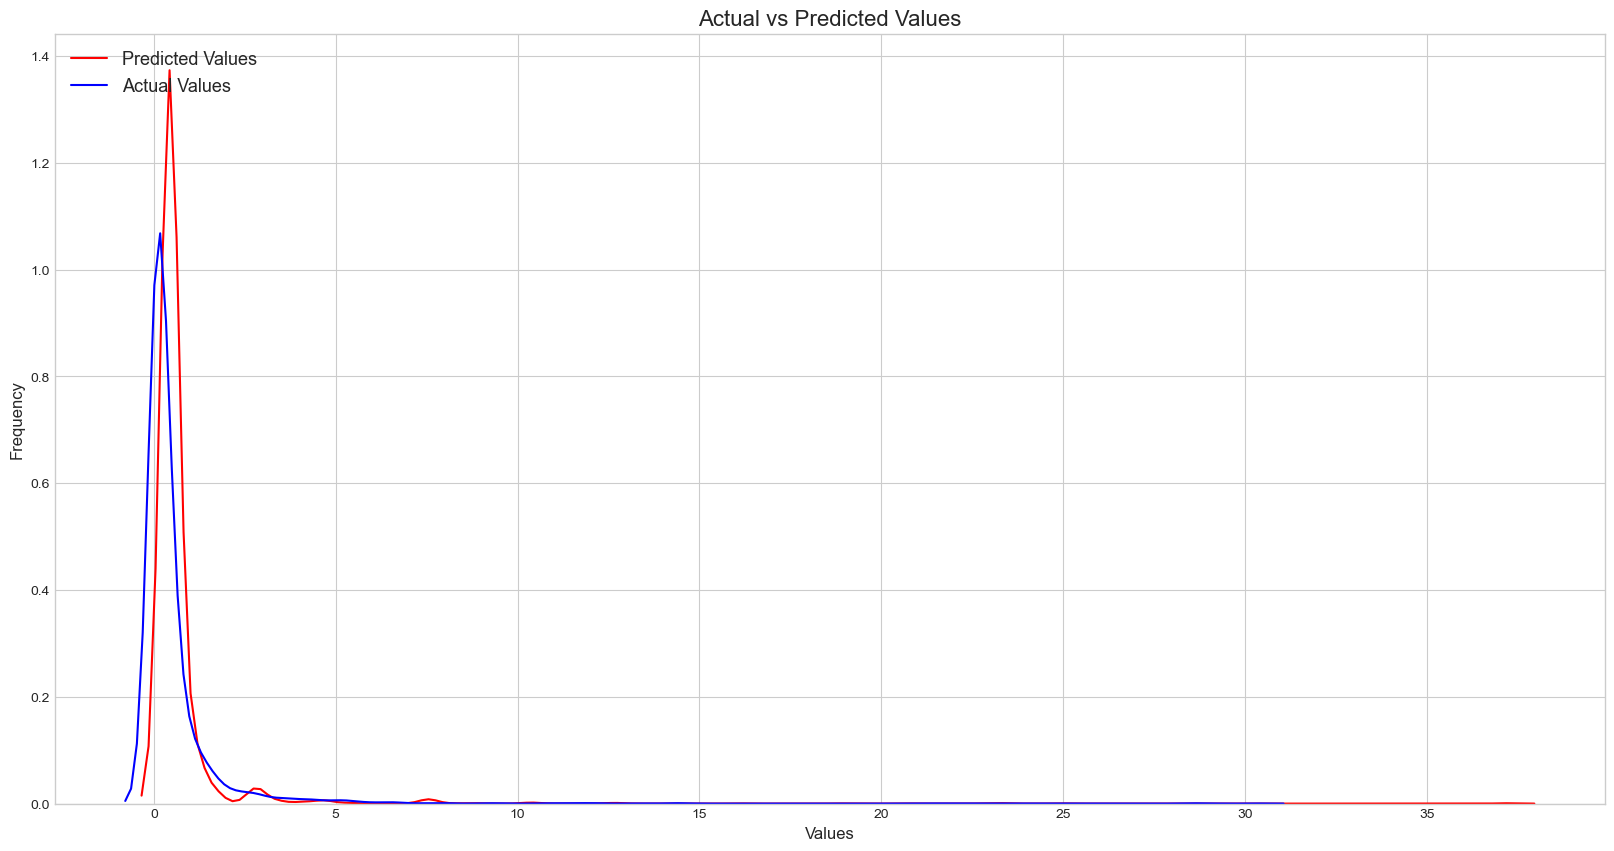

In [344]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

#### ***Check out accuracy : RMSE**

In [345]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE: {}'.format(rmse))

RMSE: 0.49645067854880864


**RMSE의 값의 약 0.50로 위의 그래프에서 확인할 수 있듯이 <br>
개별 데이터에 대한 예측값과 실제값 간의 오차가 큰 부분이 있음을 확인할 수 있다.**

#### **Step 7: Improving accuracy (Ada)**

**(1) Tuning n parameter**


최대 r2 score:  0.884090658770609 n = 13


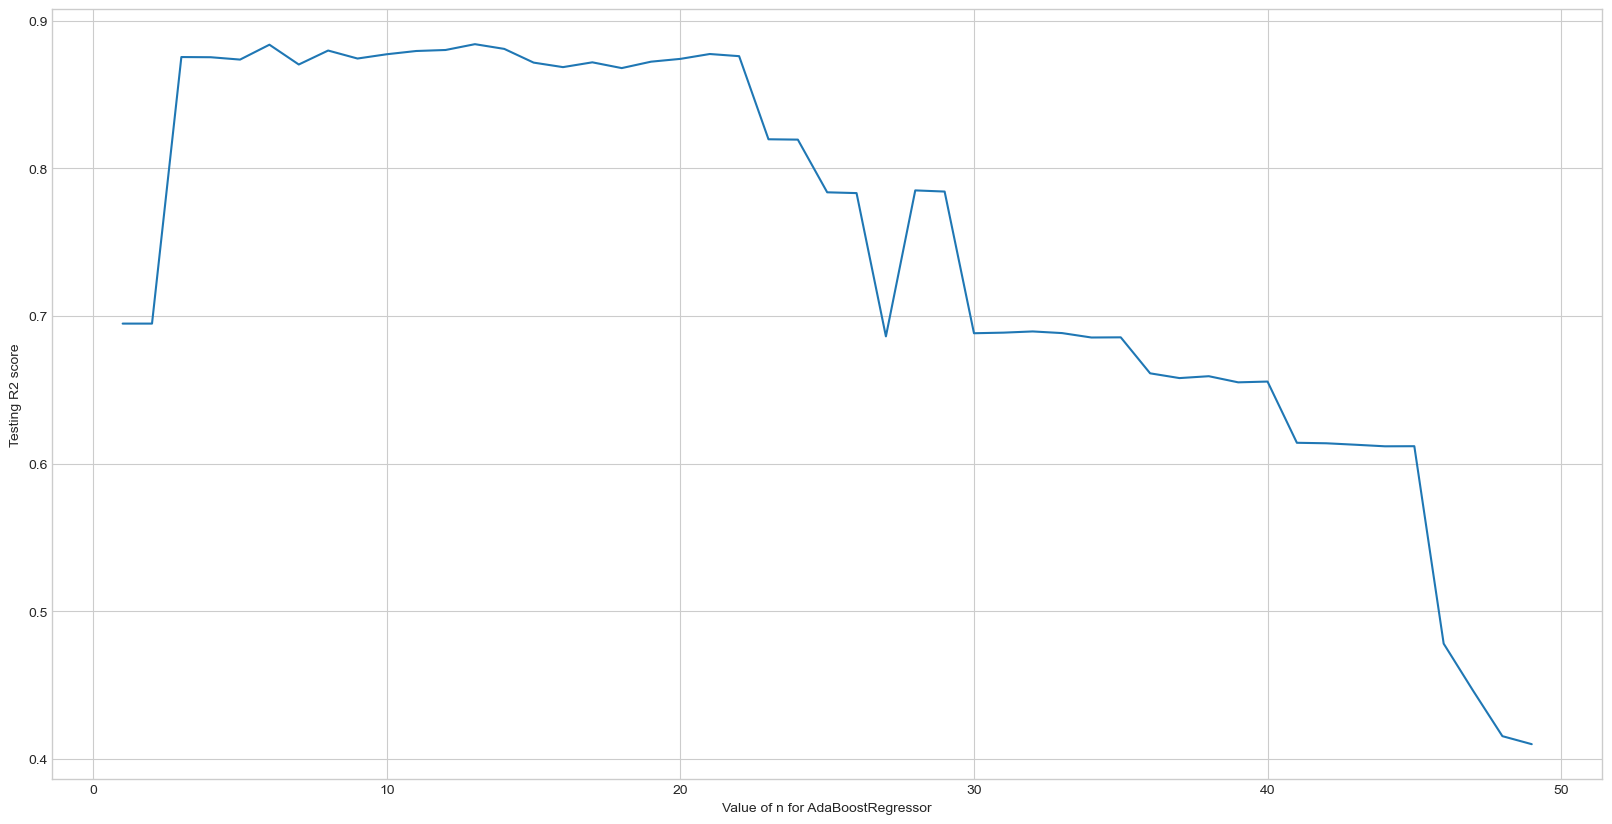

In [356]:
scaler = StandardScaler()

X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

n_range = range(1, 50)
accuracy_scores = []

for n in n_range:
	ada = AdaBoostRegressor(random_state=0, n_estimators = n)
	ada.fit(X_train, y_train)
	yhat = ada.predict(X_test)
	accuracy_scores.append(r2_score(y_test, yhat))

max_accuracy = max(accuracy_scores)
max_n = n_range[accuracy_scores.index(max_accuracy)]

print("\n최대 r2 score: ",max_accuracy,"n =", max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for AdaBoostRegressor')
plt.ylabel('Testing R2 score')
plt.show()

**모델의 정확도를 높이기 위해, n값을 튜닝해보았다. <br>
n값을 1부터 50까지 순차적으로 늘려가면서 r2 score가 언제 가장 높은지 확인하였다. <br>
튜닝 결과 n값이 13일 때 r2 score의 값이 약 0.884로 가장 높았다.**

**(2) Changing split ratio**

Test Size: 0.2
최대 r2 score:  0.9152982615273947 n = 10 

Test Size: 0.3
최대 r2 score:  0.884090658770609 n = 13 

Test Size: 0.4
최대 r2 score:  0.9070114237485576 n = 8 



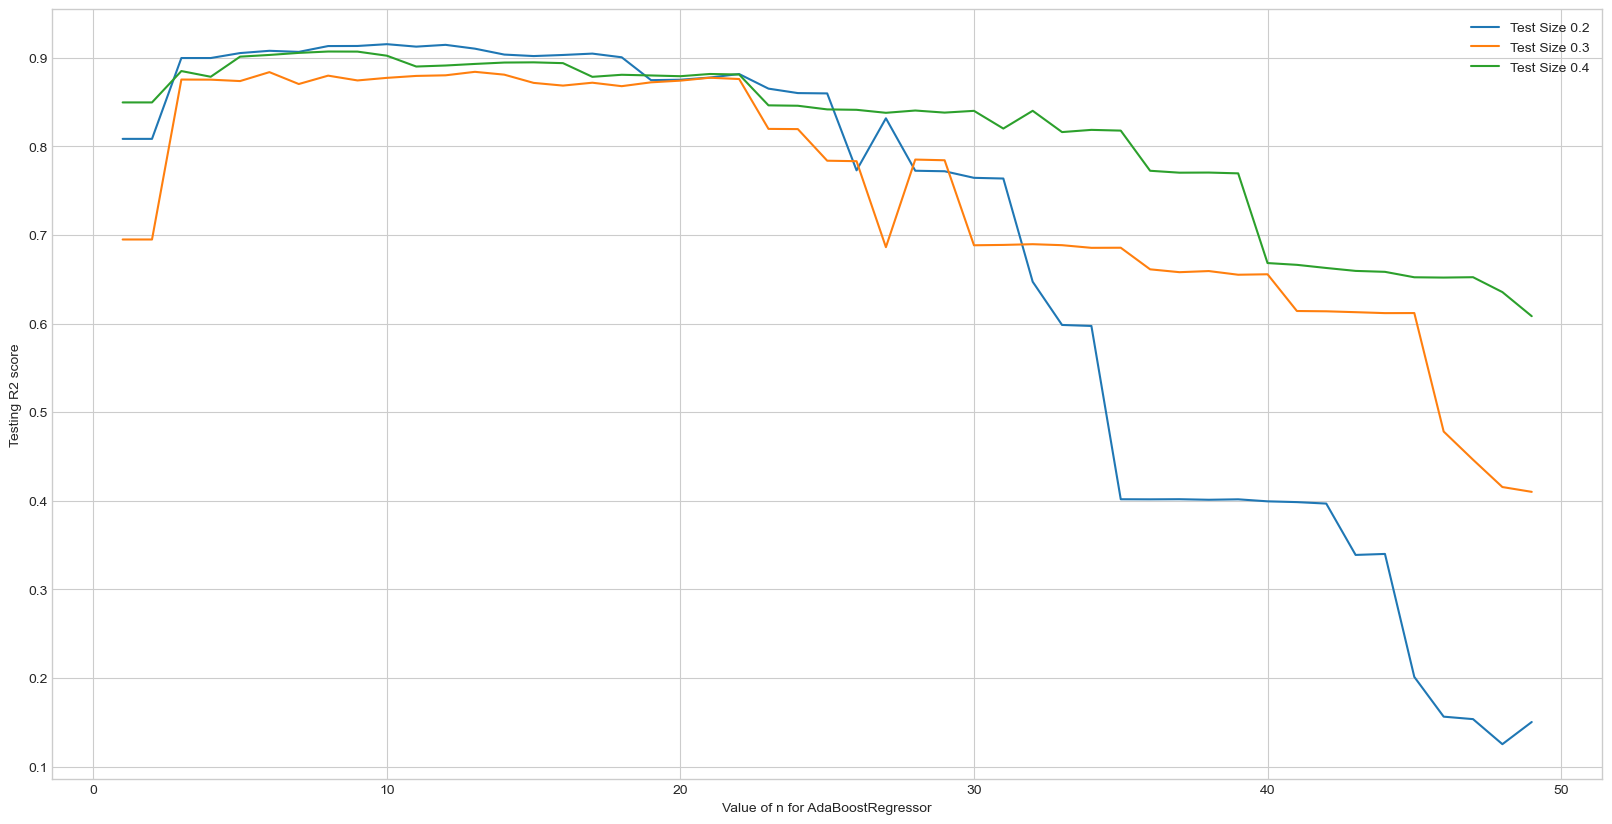

In [355]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X1_var_scaled, y_var, test_size = test_size, random_state = 0)

    n_range = range(1, 50)
    accuracy_scores = []

    for n in n_range:
    	ada = AdaBoostRegressor(random_state=0, n_estimators = n)
    	ada.fit(X_train, y_train)
    	yhat = ada.predict(X_test)
    	accuracy_scores.append(r2_score(y_test, yhat))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]
    
    print("Test Size:", test_size)
    print("최대 r2 score: ",max_accuracy,"n =", max_n,"\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for AdaBoostRegressor')
plt.ylabel('Testing R2 score')
plt.legend()
plt.show()

**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
테스트데이터 사이즈가 0.2인 경우 n=10일때 R2 score 값이 약 0.92로 이전보다 더 높은 값을 얻을 수 있었다.**

0.9152982615273947


C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\1064525902.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\1064525902.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

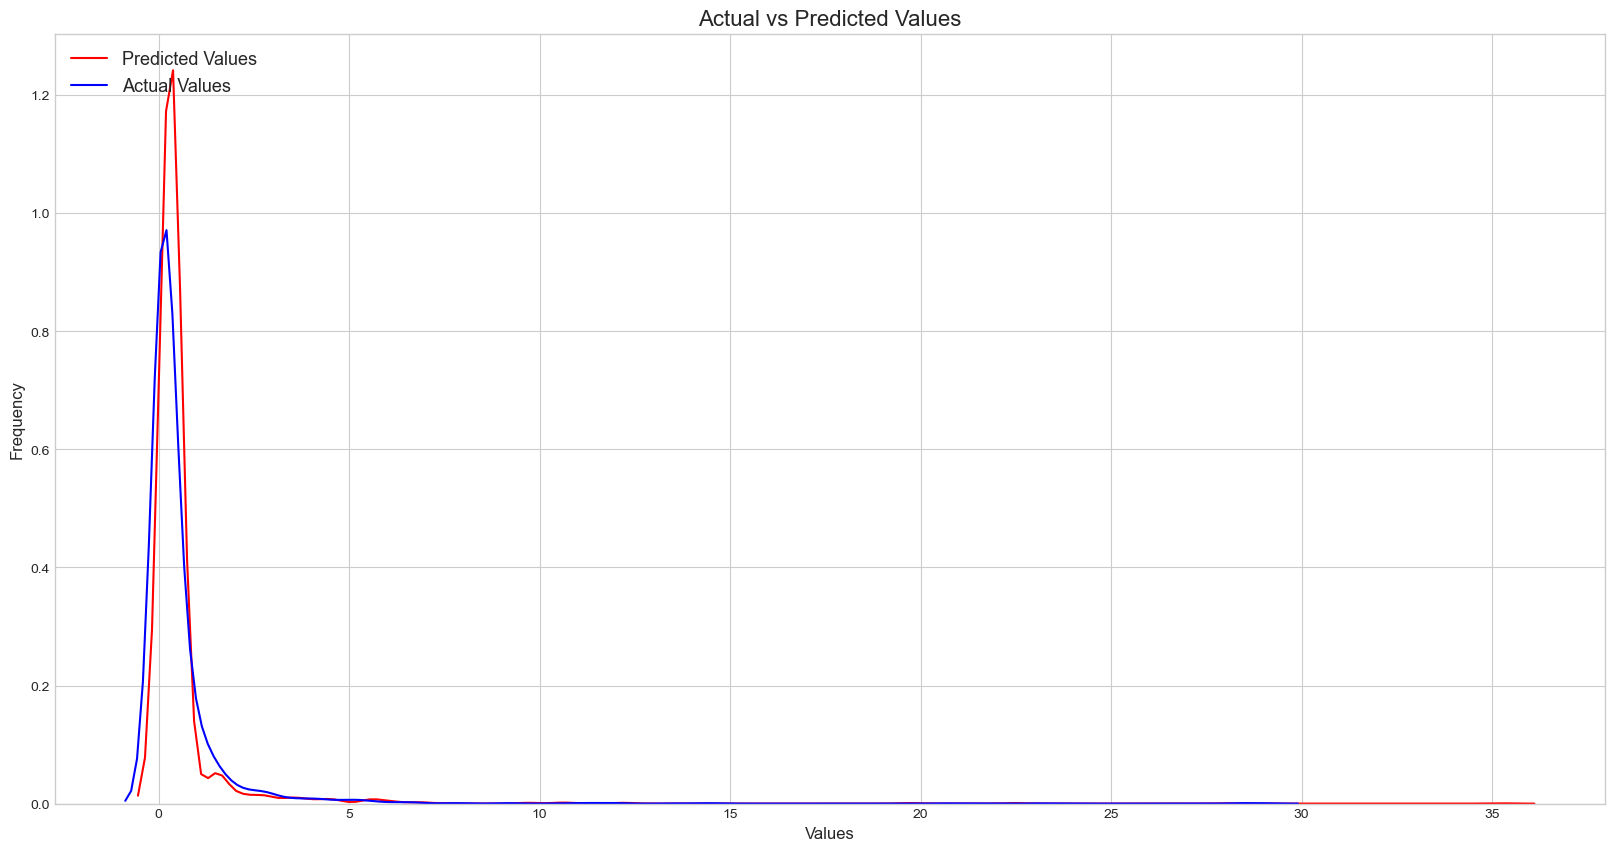

In [359]:
X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.2, 
		random_state = 0)

ada = AdaBoostRegressor(random_state = 0, n_estimators = 10)
ada.fit(X_train, y_train)
yhat = ada.predict(X_test)

print(r2_score(y_test, yhat))

sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [361]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE: {}'.format(rmse))

RMSE: 0.43547839843173136


**그때의 예측값과 실제값의 분포도는 위와 같으며 RMSE의 값도 이전보다 감소한 것을 알 수 있다.**

### **4. Ensemble Model : RandomForestRegressor**

#### **Step 5: Training model and checking out accuracy (RF)**

In [362]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

#### **Step 6: Checking accuracy (MLR)**

In [363]:
from sklearn.metrics import r2_score
print(r2_score(y_test, yhat))

0.9842085342517688


**'NA_Sales'를 독립 변수로, 'Global_Sales'를 종속 변수로 하는 AdaBoost 회귀 모델을 훈련하고, <br>
모델의 성능을 평가한 결과 R2 score의 값은 약 0.98이다. <br>
MLR 모델의 성능보다 조금 떨어지지만 모델이 데이터의 변동을 잘 설명한다고 할 수 있다.**

**Constructing a distribution plot by combining the predicted values and the actual values**

C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\2073318229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot

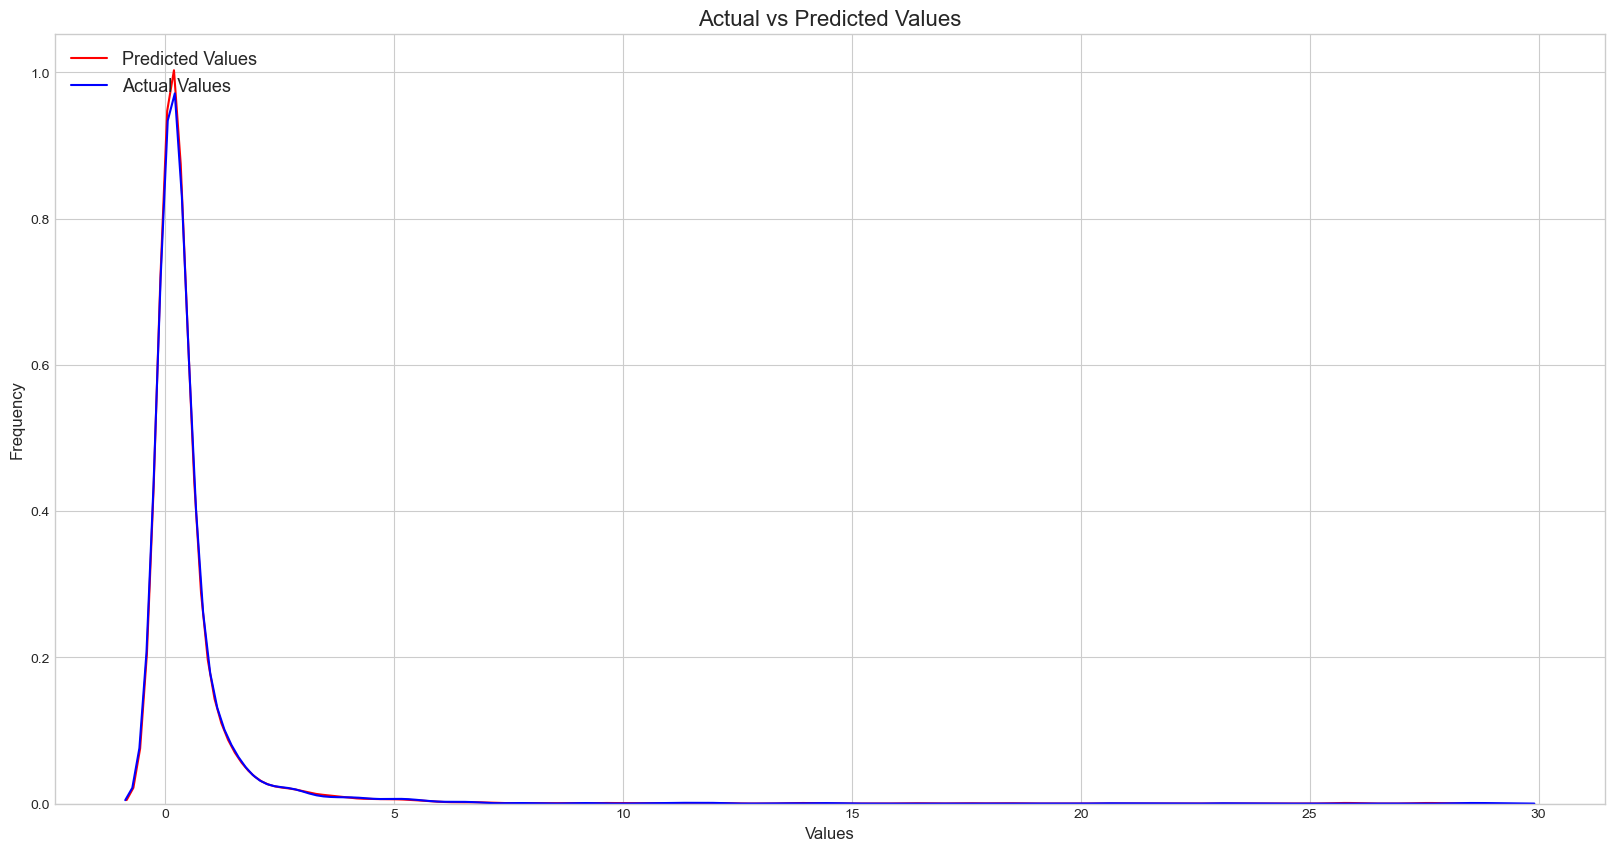

In [364]:
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

#### ***Check out accuracy : RMSE**

In [365]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE: {}'.format(rmse))

RMSE: 0.1880319614019709


**RMSE의 값의 약 0.19로 위의 그래프에서 확인할 수 있듯이 <br>
개별 데이터에 대한 예측값과 실제값 간의 오차가 크지 않음을 확인할 수 있다.**

#### **Step 7: Improving accuracy (RF)**

**(1) Tuning n parameter**


최대 r2 score:  0.9933741294689654 n = 81


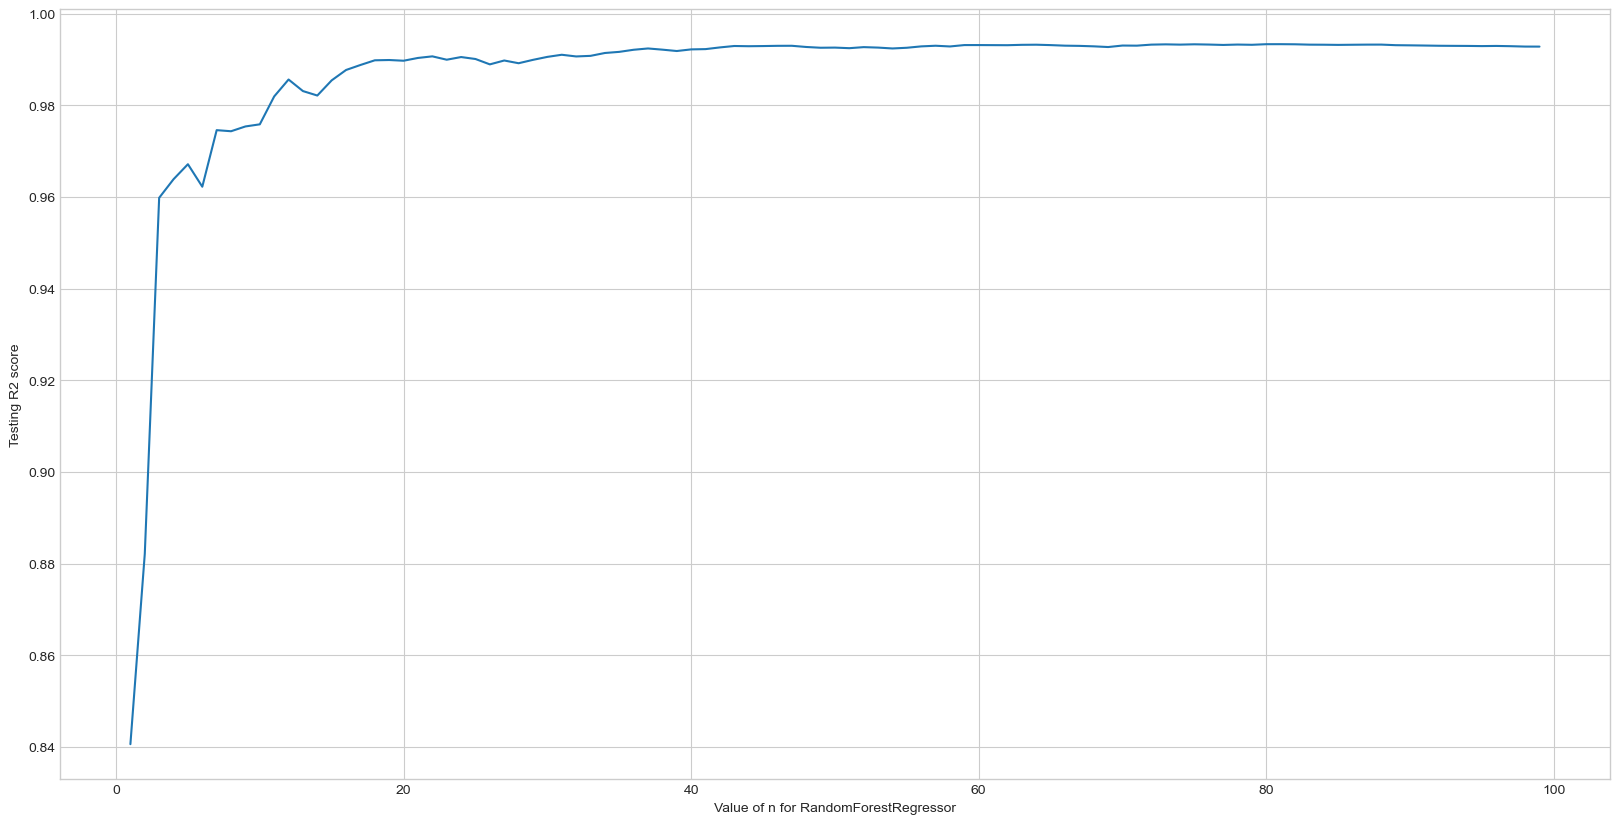

In [369]:
scaler = StandardScaler()

X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

n_range = range(1, 100)
accuracy_scores = []

for n in n_range:
	rf = RandomForestRegressor(random_state=0, n_estimators = n)
	rf.fit(X_train, y_train)
	yhat = rf.predict(X_test)
	accuracy_scores.append(r2_score(y_test, yhat))

max_accuracy = max(accuracy_scores)
max_n = n_range[accuracy_scores.index(max_accuracy)]

print("\n최대 r2 score: ",max_accuracy,"n =", max_n)

import matplotlib.pyplot as plt

plt.plot(n_range, accuracy_scores)
plt.xlabel('Value of n for RandomForestRegressor')
plt.ylabel('Testing R2 score')
plt.show()

**모델의 정확도를 높이기 위해, n값을 튜닝해보았다. <br>
n값을 1부터 100까지 순차적으로 늘려가면서 r2 score가 언제 가장 높은지 확인하였다. <br>
튜닝 결과 n값이 81일 때 r2 score의 값이 약 0.99로 가장 높았다.**

Test Size: 0.2
최대 r2 score:  0.9917507795012883 n = 27 

Test Size: 0.3
최대 r2 score:  0.9933741294689654 n = 81 

Test Size: 0.4
최대 r2 score:  0.9879079293274144 n = 21 



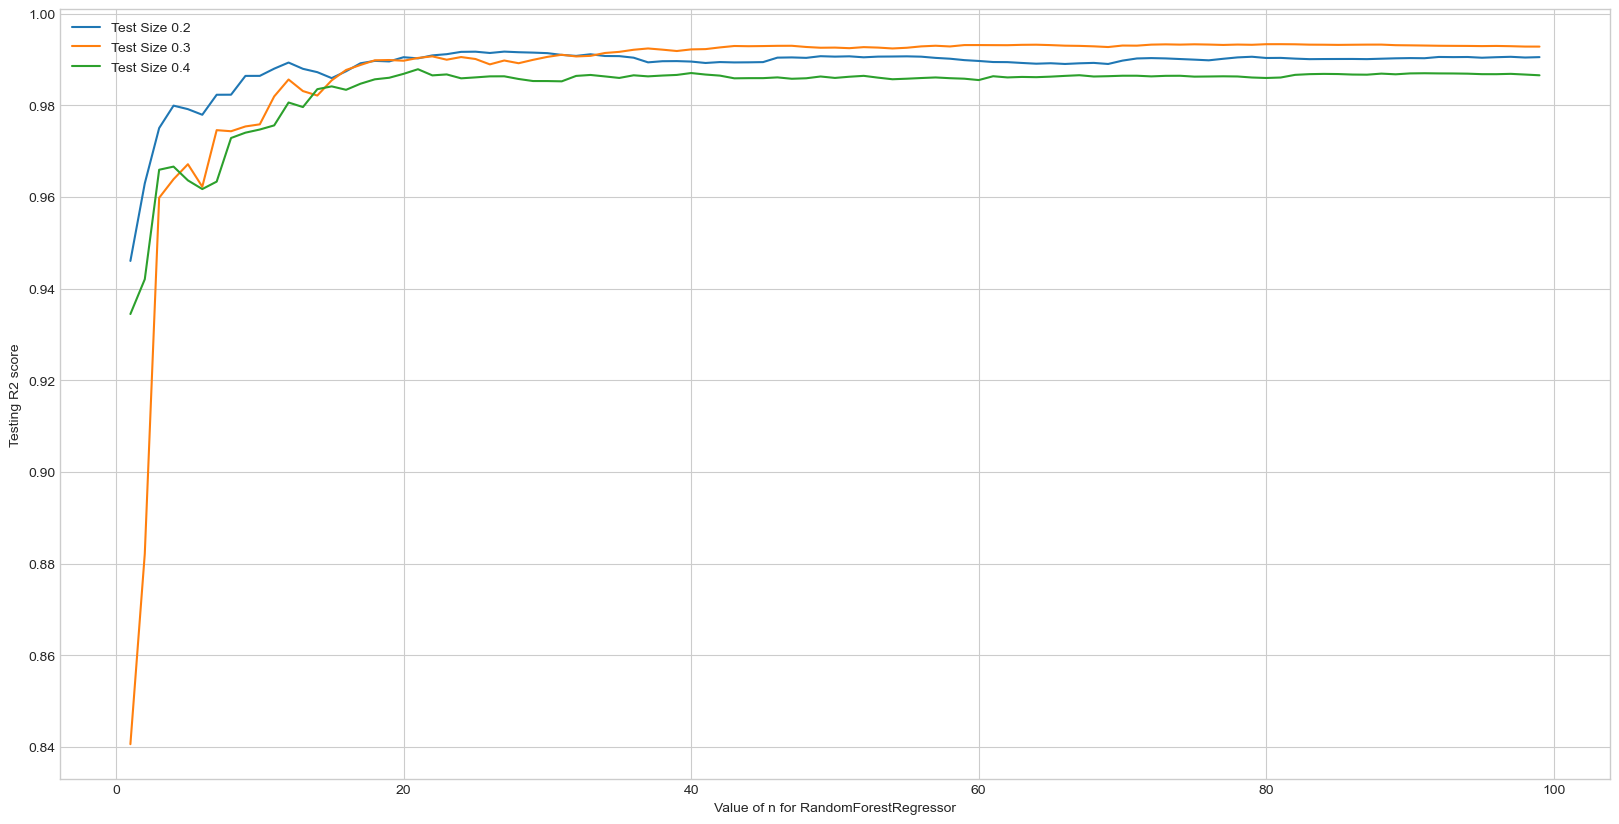

In [372]:
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
    	X1_var_scaled, y_var, test_size = test_size, random_state = 0)

    n_range = range(1, 100)
    accuracy_scores = []

    for n in n_range:
    	rf = RandomForestRegressor(random_state=0, n_estimators = n)
    	rf.fit(X_train, y_train)
    	yhat = rf.predict(X_test)
    	accuracy_scores.append(r2_score(y_test, yhat))

    max_accuracy = max(accuracy_scores)
    max_n = n_range[accuracy_scores.index(max_accuracy)]
    
    print("Test Size:", test_size)
    print("최대 r2 score: ",max_accuracy,"n =", max_n,"\n")

    plt.plot(n_range, accuracy_scores, label=f'Test Size {test_size}')

plt.xlabel('Value of n for RandomForestRegressor')
plt.ylabel('Testing R2 score')
plt.legend()
plt.show()

**훈련데이터와 테스트데이터의 비율을 바꾸어 모델의 성능을 비교한 결과, <br>
이전과 동일하게 테스트데이터 사이즈가 0.3인 경우 n=81일때 R2 score 값이 가장 높다.**

0.9933741294689654


C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\3878444161.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\유승미\AppData\Local\Temp\ipykernel_4676\3878444161.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

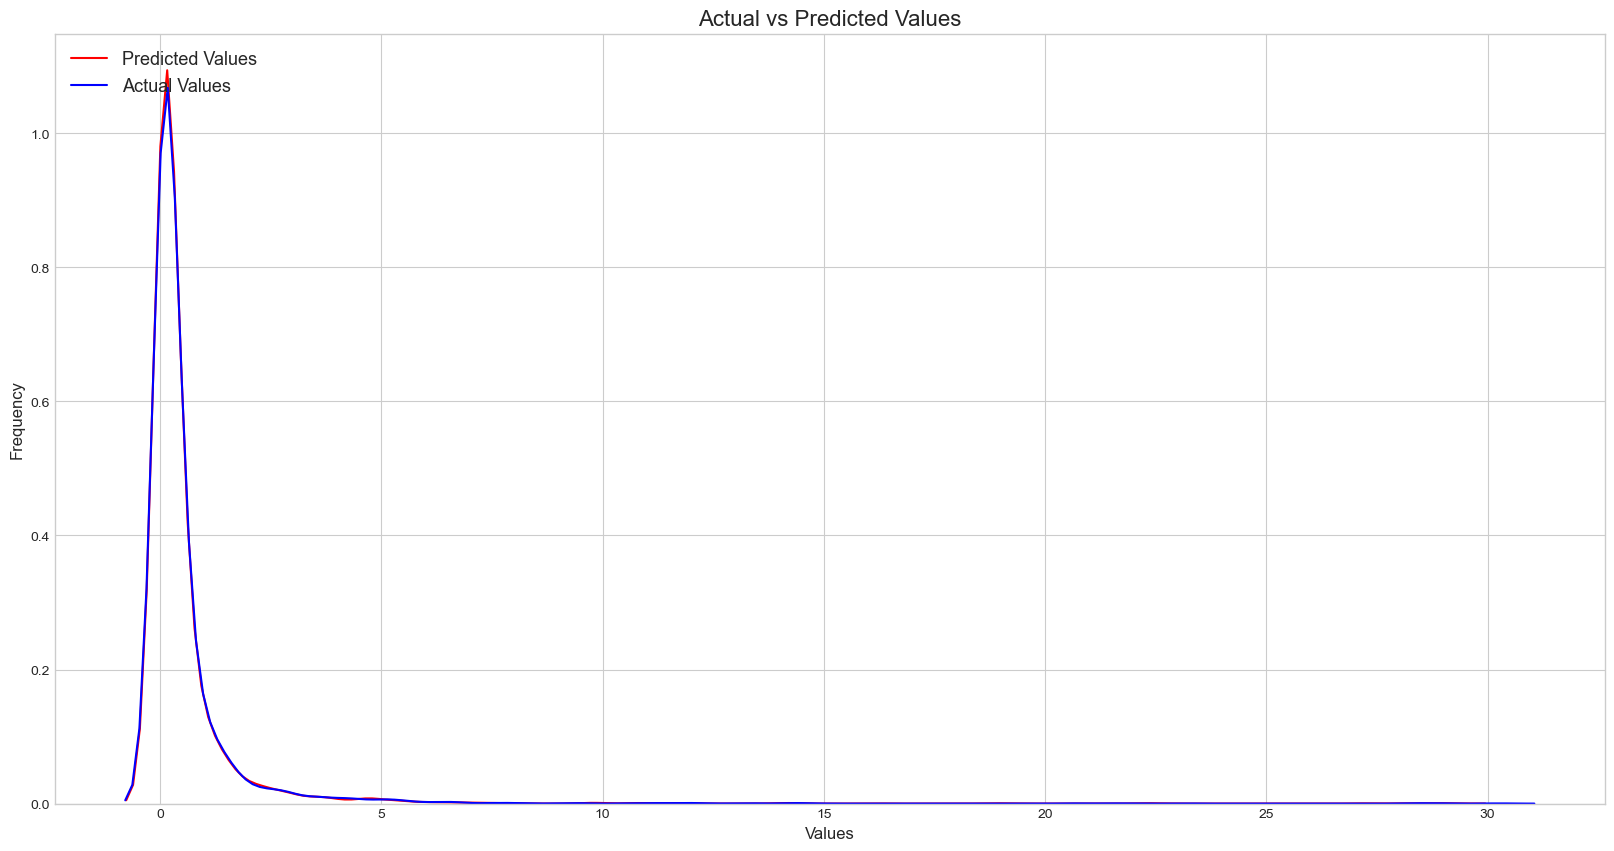

In [373]:
X1_var = df[['NA_Sales',
		'EU_Sales',
		'JP_Sales',
        'Other_Sales']]
X1_var_scaled =  scaler.fit_transform(X1_var)
y_var = df['Global_Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(
		X1_var_scaled, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

rf = RandomForestRegressor(random_state = 0, n_estimators = 81)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

print(r2_score(y_test, yhat))

sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

In [374]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('RMSE: {}'.format(rmse))

RMSE: 0.118446994439084


**그때의 예측값과 실제값의 분포도는 위와 같으며 RMSE의 값도 이전보다 감소한 것을 알 수 있다.**